In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [3]:
# TODO : Import the Data from the kaggle API
df = pd.read_csv('AB_Test_Results2.csv')

# Data Understanding

In [4]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame,
# Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME,
# Counting Unique Users in USER_ID
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [6]:
df['VARIANT_NAME'].value_counts()

,count
VARIANT_NAME,
variant,5016
control,4984


In [7]:
df['USER_ID'].nunique()

6324

# Average Revenue by VARIANT_NAME

In [9]:
#TODO
revenue_avg_control = df.groupby('VARIANT_NAME')['REVENUE'].mean()['control']
revenue_avg_variant = df.groupby('VARIANT_NAME')['REVENUE'].mean()['variant']
print(f'Average Revenue for Control: {revenue_avg_control}')
print(f'Average Revenue for Variant: {revenue_avg_variant}')

Average Revenue for Control: 0.12901284109149277
Average Revenue for Variant: 0.07006977671451355


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

In [10]:
from scipy import stats
revenue_control = df[df['VARIANT_NAME'] == 'control']['REVENUE']
revenue_variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE']

t_stat, p_value = stats.ttest_ind(revenue_control, revenue_variant, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 1.268403803110966
P-value: 0.20469713432410777


# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

In [11]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?
revenue_variant = df[df['VARIANT_NAME'] == 'variant']['REVENUE']
revenue_control = df[df['VARIANT_NAME'] == 'control']['REVENUE']
stat_variant, p_value_variant = stats.shapiro(revenue_variant)
stat_control, p_value_control = stats.shapiro(revenue_control)
alpha = 0.05
print(f"Variant Group: {p_value_variant}")
print(f"Control Group: {p_value_control}")

if p_value_variant < alpha:
    print("The data for the variant is not normally distributed.")
else:
    print("The data for the variant is normally distributed.")

if p_value_control < alpha:
    print("The data for the control is not normally distributed.")
else:
    print("The data for the control is normally distributed.")

Variant Group: 2.7310104028899288e-95
Control Group: 2.4983285100057203e-95
The data for the variant is not normally distributed.
The data for the control is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?
stat, p_value = stats.levene(revenue_variant, revenue_control)
print(f"Levene's test statistic: {stat}")
print(f"Levene's test p-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: The variances of the variant and control groups are significantly different.")
else:
    print("Fail to reject H₀: The variances of the variant and control groups are not significantly different.")

Levene's test statistic: 1.6158565214488871
Levene's test p-value: 0.2037000785338918
Fail to reject H₀: The variances of the variant and control groups are not significantly different.


# Non-Parametric Test (mannwhitneyu Test)

In [14]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?
stat, p_value = stats.mannwhitneyu(revenue_variant, revenue_control, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: The distributions of the variant and control groups are significantly different.")
else:
    print("Fail to reject H₀: The distributions of the variant and control groups are not significantly different.")

Mann-Whitney U Test Statistic: 12478180.0
P-value: 0.47825247965294926
Fail to reject H₀: The distributions of the variant and control groups are not significantly different.


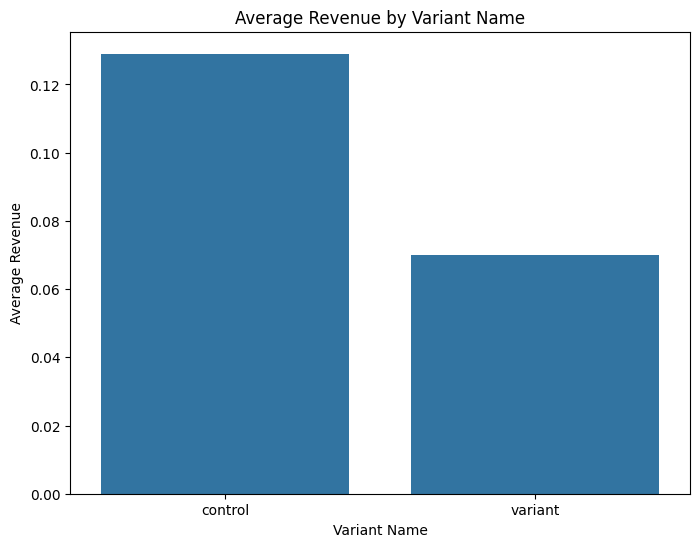

In [16]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
avg_revenue = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_revenue, x='VARIANT_NAME', y='REVENUE')
plt.title('Average Revenue by Variant Name')
plt.xlabel('Variant Name')
plt.ylabel('Average Revenue')
plt.show()